<div align="center">

# <span style="font-size: 2em;">Welcome to the Perceptron!</span>

</div>

<p align="center">
  <img src="img_perceptron-Photoroom.png" alt="Header" />
</p>

<div align="center">

# <span style="font-size: em;">Supervised Learning!</span>

</div>

To create a better picture of what the perceptron really is, I will start from an earlier conversation about Supervised learning as a type of machine learning. As earlier mentioned, in supervised learning, the model assumes that for every set of data {$x$}, there exists a function $f(x)$ which creates label {$y$} for the measurements. In other words, there exists a function $f(x)$ which takes in an instance of $x^{i}$ and returns $y^{i}$. The term supervised comes from the fact that in this case, we happen to know some [$x$, $y$] pairs assigned by the function $f(x)$. The model now need to make predictions on more measurements not part of $x$. Supervised learning can be devided into two: 

1. Regression $\rightarrow$ which is a model in which $y$ is a real number and
2. Classification $\rightarrow$ which is model in which $y$ is categorical, i.e separating data with some function.


#### The general Framework


#### The single Neuron Model
To better explain the perceptron, take this analogy

$\dagger$ Take a very simple mono-neuron creature that can only receive two stimuli at once. The organism can only sense sun's heat and light, and react accordingly, by either moving into its burrow in the case of excess light, or into a nearby water-well in the case of excess heat. Therefore, technically speaking, the organism has a binary of choices, i.e, either go to the burrow or to the water-well, depending on the magnitude of the of either of the stimuli or a linear combination of both —— taking into account some personal bias and preference, i.e, how much heat is excess to the creature. This is the basic set up of the perceptron. As shown in the figure below, $x_1^{(i)}$, $x_2^{(i)}$ are the two inputs in this case, the heat or light. 

![The Perceptron](IMG_0184-Photoroom.png)

The $W$ in this case is the weight, or the the measure of "how much" of the stimuli causes the reaction. These measure "weight" of a consideration of the input signal. Think of this as what determins whether the organism would rather go to the burrow or into the well. The $b$ is the bias, which comes in handy in cases of a linear combination of the inputs, in this case and $y_1^{(i)}$ is the output, or the labels, for some given $x_1^{(i)}$.

The $Z$ region can be defined as the preactivation region with some preactivation value $z$ given as 

$$Z = w_1x_1^{i} + w_2x_2^i +b $$ 

and $a$ is the post-activation region where $$ a = \Phi z $$ for some actication function $\Phi$. In our case study of the small organism, the $a$ is the output, which is the action taken by the organism. For the case of a classification function like the organism where two actions can be taken; this can be taken as a binary classification problem, i.e, a binary of solns exists, classifiable with an $either$ $or$ . Using a function like numpy's `where`, we can design the act of going to the burrow as 1 and the action of going to the water well as -1 with `y = np.where(y== "water_well", -1,1 )`. What follows here is the overarching framework of the perceptron.




<div align="center">

# <span style="font-size: em;">Coding the Perceptron from scratch!</span>

</div>

To code a perceptron example from scartch, we can represent the general workflow as in the chart below. 

![Flowchart](flowchart.png)

In this work, I will use a custom generated data representing the Matatu situation in Nairobi, Kenya. There can be two different types of Matatus in kenya. That is, Nganya or wazii. Any vehicle with a tire diameter of up to 20 inches is called  Nyanya while anything above that is called Wazii. Similary, any vehicle with a steering wheel up to 20 inches in a Wazii , while anything with a steering wheel above that is a Nganya. The random generated data also adds some outliars to make it more interesting. The data can be visualized on a scatter plot as in below.


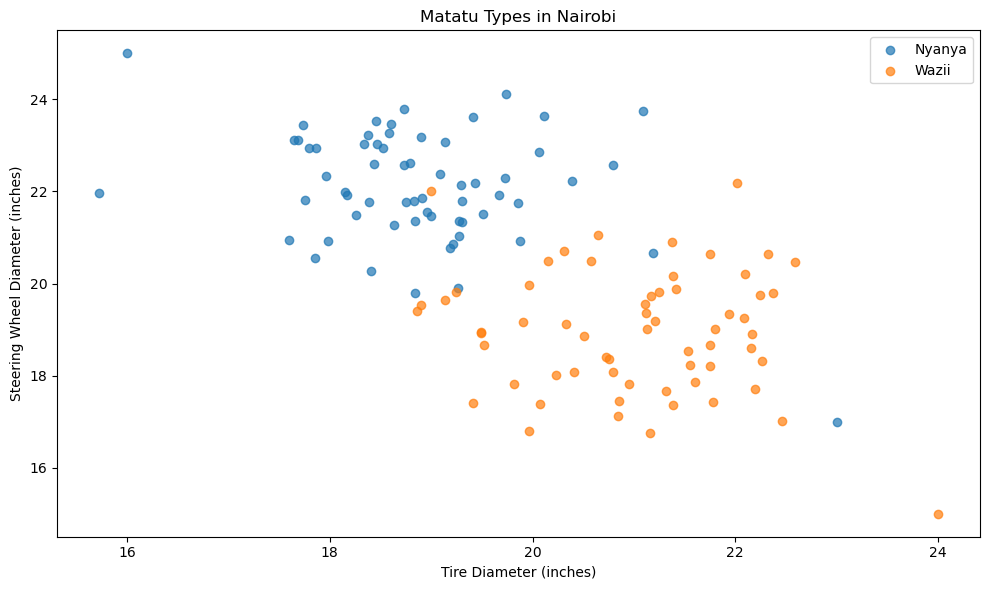

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


nyanya_tire_diameter = np.random.normal(19, 1, 60)
nyanya_steering_diameter = np.random.normal(22, 1, 60)

# Wazii: Tire diameter > 20, Steering wheel <= 20
wazii_tire_diameter = np.random.normal(21, 1, 60)
wazii_steering_diameter = np.random.normal(19, 1, 60)

# Add some outliers
nyanya_tire_diameter = np.append(nyanya_tire_diameter, [16, 23])
nyanya_steering_diameter = np.append(nyanya_steering_diameter, [25, 17])

wazii_tire_diameter = np.append(wazii_tire_diameter, [24, 19])
wazii_steering_diameter = np.append(wazii_steering_diameter, [15, 22])

# Combine the data into a DataFrame
data_close = pd.DataFrame({
    'Tire_Diameter': np.concatenate([nyanya_tire_diameter, wazii_tire_diameter]),
    'Steering_Diameter': np.concatenate([nyanya_steering_diameter, wazii_steering_diameter]),
    'Type': ['Nyanya'] * len(nyanya_tire_diameter) + ['Wazii'] * len(wazii_tire_diameter)
})

# Create scatter plot
plt.figure(figsize=(10, 6))
for label, color in zip(['Nyanya', 'Wazii'], ['blue', 'green']):
    subset = data_close[data_close['Type'] == label]
    plt.scatter(subset['Tire_Diameter'], subset['Steering_Diameter'], label=label, alpha=0.7)


plt.xlabel('Tire Diameter (inches)')
plt.ylabel('Steering Wheel Diameter (inches)')
plt.title('Matatu Types in Nairobi')
plt.legend()
plt.tight_layout()
plt.show()



Herein, I use the Tire_Diameter and Steering_Wheel diameter measurements as my input signals and the labels "Nganya" and "Wazii" and using these, try to learn to predict species into the two categories. Anything like Wazii is asigned a 1, while otherwise is -1. We can visualize the data as in below.(These measurements are actually fictional, because I am not precisely sure what exactly they use to classify the Matatus.)

In [18]:
#Import the needed libraries

import numpy as np #to handle the data (numerical manipulation)
import matplotlib.pyplot as plt #for plotting
import pandas as pd #for tabulated data manipulation

#import seaborn as sns
from mlxtend.plotting import plot_decision_regions #for plotting decision boundaries



In [19]:
#Let us Load and read the data
df = pd.read_csv("matatu_data.csv")


df.iloc[:124]
print(df)
print(f"Number of Wazii: {len(wazii_tire_diameter)}")
print(f"Number of Nyanya: {len(nyanya_tire_diameter)}")

     Tire_Diameter  Steering_Diameter    Type
0        19.114622          22.597653  Nyanya
1        18.124100          21.414184  Nyanya
2        20.374533          22.853386  Nyanya
3        19.955275          21.611171  Nyanya
4        20.007653          22.999330  Nyanya
..             ...                ...     ...
119      24.121897          19.655604   Wazii
120      20.638240          19.379281   Wazii
121      22.215322          20.609074   Wazii
122      24.000000          15.000000   Wazii
123      19.000000          22.000000   Wazii

[124 rows x 3 columns]
Number of Wazii: 62
Number of Nyanya: 62


In [20]:
y = df.iloc[0:125].Type.values
y = np.where(y== "Wazii", 1,-1 )

x= df[["Tire_Diameter" , "Steering_Diameter"]].iloc[:125].values



The above creates an array `y` of labels (-1 and 1) and another array for features, `x`. We'll create a class to store the data because we will mostly instantiate it. We begin by defining a class called Perceptron. 

In [ ]:
from tqdm import trange # for progress bar

"""
    A simple implementation of the Perceptron algorithm for binary classification.

    This class describes a single-layer neural network (a "neuron") that learns to classify
    data into one of two categories using a linear decision boundary. It updates weights
    based on the difference between predicted and actual labels using the Perceptron Learning Rule.

    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0). This is the number that will be multiplied by the difference between the predicted value and the actual value to update the weights.
        and the actual value to update the weights. Essentially, it determines the size of the step the algorithm takes in the direction of the minimum.
    epochs : int
        The number of passes over the training dataset. This is the repetition of the training process, also the number of times the weights are updated.

    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting, including bias term.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    Methods
    -------
    train(x, y):
        Fit training data.
    net_input(x):
        Calculate net input (dot product + bias).
    predict(x):
        Return class label prediction (-1 or 1).
    """

class Perceptron(object):
   def __init__(self, eta = 0.5, epochs=100):
      self.eta = eta
      self.epochs = epochs
    

   def train(self, x, y):
      self.w_ = np.random.rand(1 + x.shape[1])
      self.errors_ = []

      '''The above code initializes the weights in the Perceptron object to random values and creates an empty list to store the number of misclassifications in each epoch. 
      The weights are initialized to random values to break symmetry and prevent the Perceptron from getting stuck in a local minimum. The weights are stored in an array of length equal to the number of 
      features in the input data plus one (for the bias term). The bias term is stored in the last element of the array.'''

      for _ in trange(self.epochs, desc = "Training Progress"):
            errors = 0
            for xi, target in zip(x,y):# This creates a tuple of the form (xi, target) for each row in the input data and the corresponding label.
                update = self.eta * self.predict(xi) - target 
                self.w_[:-1] -= update * xi
                self.w_[-1] -= update
                errors += int(self.predict(xi) != target)
                #errors += int(update !=0 )
            if errors == 0:
                return self
            else:
               self.errors_.append(errors)

      return self
   
   '''The above loops do the following:
   1: The line `update = self.eta * self.predict(xi) - target` accounts for the term \(\eta \times \hat{y} - y\). This is the difference between the predicted value and the actual value, multiplied by the learning rate.
   2: The line `self.w_[:-1] -= update * xi` updates the weights for the features. This is the product of the update x(i) as in the weights update equation \(w \arrow -\(\eta \times \hat{y} - y\ ) \times x(i).'''
   

   def net_input (self,x):
        return np.dot(x, self.w_[:-1]) + self.w_[-1]
   
   def predict (self,x):
        return np.where(self.net_input(x) >= 0 ,1,-1) 
   


In [22]:
trial = Perceptron(epochs = 2_000)

trial.train(x,y)

Training Progress: 100%|██████████| 2000/2000 [00:01<00:00, 1025.00it/s]


In [23]:
yhat = trial.predict(x)
print(y==yhat)
print(f"Accuracy: {np.mean(y == yhat) * 100:.2f}%")

[ True  True  True  True  True  True  True  True  True False  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False]
Accuracy: 95.97%


<function matplotlib.pyplot.show(close=None, block=None)>

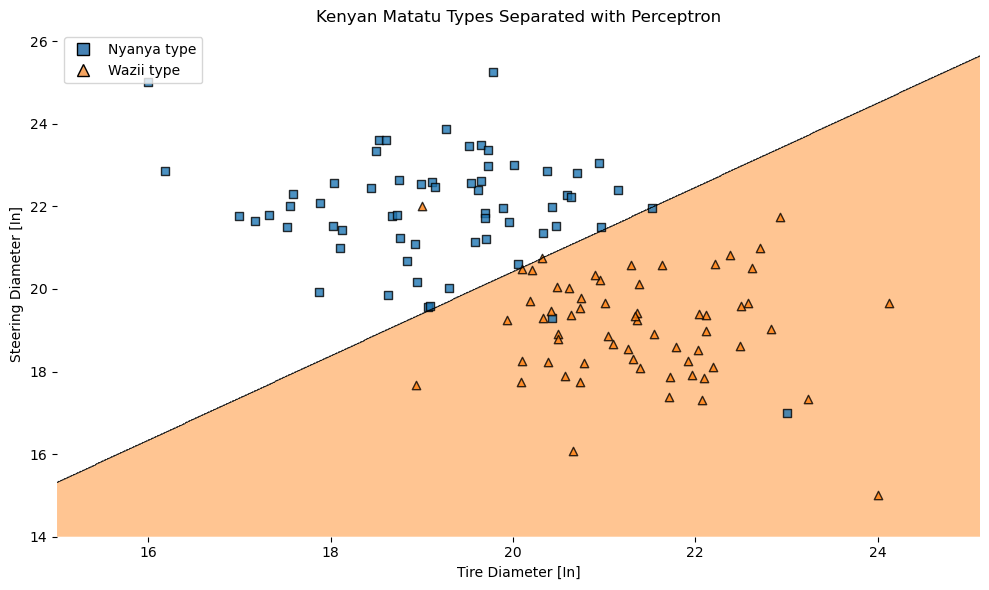

In [24]:
from matplotlib.lines import Line2D
plt.figure(figsize = (10 , 6) )
plot_decision_regions(x,y, clf = trial)

plt.title("Kenyan Matatu Types Separated with Perceptron")
plt.xlabel("Tire Diameter [In]")
plt.ylabel("Steering Diameter [In]")

custom_legend = [
    Line2D([0], [0], marker='s', color='w', label='Nyanya type',
           markerfacecolor='steelblue', markeredgecolor='black', markersize=8),
    Line2D([0], [0], marker='^', color='w', label='Wazii type',
           markerfacecolor='sandybrown', markeredgecolor='black', markersize=8)
]

plt.legend(handles=custom_legend, loc="upper left")
plt.tight_layout()
plt.show

What we see above is a separting hyperplane, such than anything lying on one side of the plane gets a 1, while anything on the other side gets a -1. The function of the plane was found by randomly generating the weights and optimizing them. 

We can also write the snippet below to show the misclassification, i.e, how many times the model got the whole predictions as a function of the number of epochs. As shown, the misclassifications are high for lower epochs but very quickly drops down. The missclassifications do not get to zero per se because the data is higly intermingled and the model struggles with the classification with some five or so highly dispersed points. Overall, the model chieves a 4.0% missclassification and a 95.97% accuracy rate  which is generally great.

Missclassification rate: 4.03%


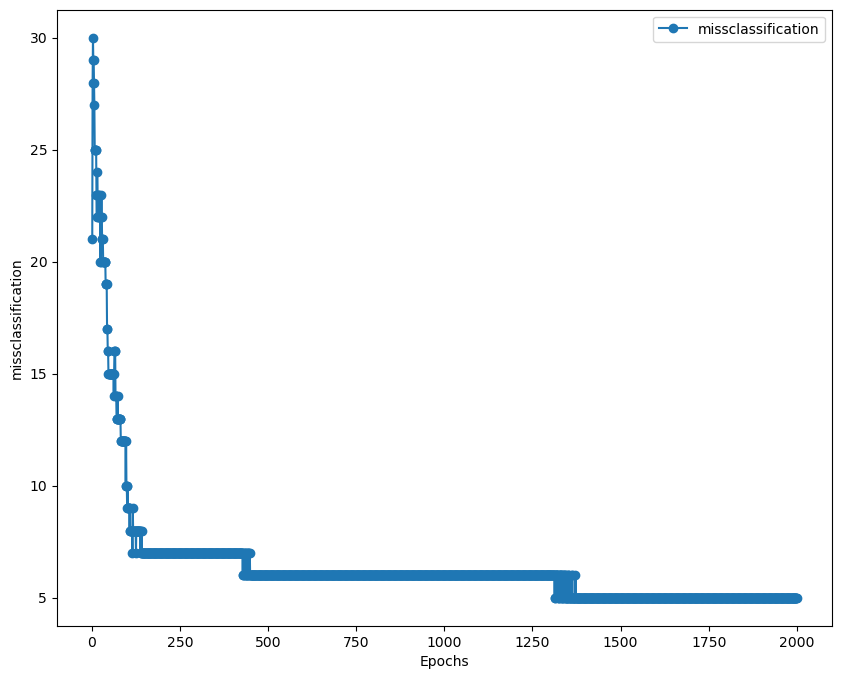

In [ ]:

plt.figure(figsize = (10 , 8) )
plt.plot(range(1, len(trial.errors_)+1), trial.errors_, marker = 'o', label = "missclassification")
misclassification_pct = [(e / len(y)) * 100 for e in trial.errors_]

print (f"Missclassification rate: {misclassification_pct[-1]:.2f}%")
plt.xlabel("Epochs")
plt.legend()
plt.ylabel("Missclassification")
plt.show()